<a href="https://colab.research.google.com/github/SuloveBhattarai/WorkFlowPyTorch/blob/main/PytorchWorkflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
from torch import nn
import matplotlib.pyplot as plt

In [ ]:
torch.__version__

'2.0.1+cu118'

Check the version of the PyTorch


In [ ]:
weight= 0.7
bias= 0.3

start=0
end=1
step=0.02
X= torch.arange(start, end, step).unsqueeze(dim=1)
y= weight*X+bias
X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

unsqueeze(dim=1) is used to change the shape of the tensor. In this case, it adds an extra dimension at position dim=1, effectively converting the 1D tensor into a 2D tensor with one of its dimensions having size 1.


**Now let's build a model which will learn the relationship between X (features) and y (labels). **
**At first we need to split data into training and test sets**

*Let's create a train/test split*

In [ ]:
train_split= int(0.8* len(X))
X_train, y_train= X[:train_split], y[:train_split]
X_test, y_test= X[train_split:], y[train_split:]
len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [ ]:
def plot_predictions(train_data= X_train,
                     train_labels= y_train,
                     test_data= X_test,
                     test_labels= y_test,
                     predictions= None):
  plt.figure(figsize= (10,7))
  #PLot of the training data in blue
  plt.scatter(train_data, train_labels, c= "b", s=4, label= "Training Data")

  #Plot test data in green
  plt.scatter(test_data, test_labels, c= "g", s= 4, label= "Testing Data")

  if predictions is not None:
    plt.scatter(test_data, predictions, c= "r", s=4, label= "Predictions")

  #Show the legend
  plt.legend(prop= {"size": 14});



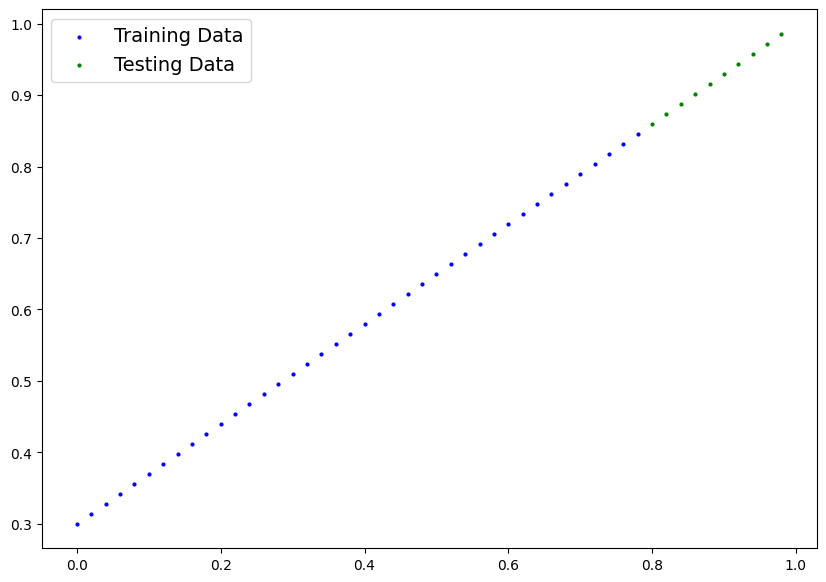

In [ ]:
plot_predictions();

Building a model to use blue dots to predict the green dots

In [ ]:
#Create a class
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.weights= nn.Parameter(torch.randn(1,dtype= torch.float),requires_grad=True)
    self.bias= nn.Parameter(torch.randn(1, dtype=torch.float),requires_grad=True)

  def forward(self, x: torch.Tensor)-> torch.Tensor:
    return self.weights+ x* self.bias

This forward method implements the linear regression formula: y = mx + b, where y is the predicted output, x is the input data, self.weights is the slope (weight) parameter m, and self.bias is the intercept (bias) parameter b.

def forward(self, x: torch.Tensor): This defines a method named forward within your custom PyTorch model class. The method takes one argument, x, which is expected to be a PyTorch tensor representing the input data.

**Contents of PyTorch Model**

In [ ]:
torch.manual_seed(42)
model_0= LinearRegressionModel()
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [ ]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

**torch.inference_model for making predictions**

In [ ]:
with torch.inference_mode():
  y_preds= model_0(X_test)

# Note: in older PyTorch code you might also see torch.no_grad()
# with torch.no_grad():
#   y_preds = model_0(X_test)

In [ ]:
#Check prdictions:
print(f"NUmber of testing samples: {len(X_test)}")
print(f"NUmber of predictions made: {len(y_preds)}")
print(f"Predicted values: \n {y_preds}")

NUmber of testing samples: 10
NUmber of predictions made: 10
Predicted values: 
 tensor([[0.4397],
        [0.4423],
        [0.4449],
        [0.4475],
        [0.4500],
        [0.4526],
        [0.4552],
        [0.4578],
        [0.4603],
        [0.4629]])


In [ ]:
torch.__version__

'2.0.1+cu118'

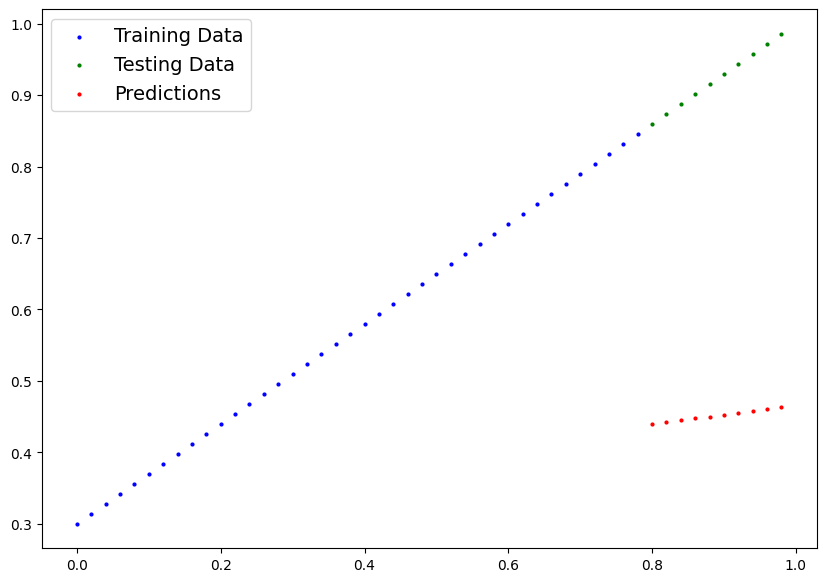

In [ ]:
plot_predictions(predictions=y_preds)

Until now, our model is making predictions randsomly. To fix this, we can update its internal parameters to represent the data better.
We can hardcode them iwth their default values as mentioned in the beginning of this.
Lets be honest, most of the time, we can't know what the ideal parameters are for a model.
Instead, we need to learn to write code to see if model can figure out itself

In [ ]:
y_test- y_preds

tensor([[0.4203],
        [0.4317],
        [0.4431],
        [0.4545],
        [0.4660],
        [0.4774],
        [0.4888],
        [0.5002],
        [0.5117],
        [0.5231]])

**Learning about Loss function and Optimizer in PyTorch**

Some of the Loss Function are Mean Absolute Error (MAE) and Binary Cross Entroy (BCE). MAE is used for regressional problems where as BCE is used for classification problems


Optimizer gives an idea on how to update the internal parameters. Stochastic gradient descent (torch.optim.SGD()) and Adam Optimizer (torch.optim.Adam())

MAE in PyTorch: torch.nn.L1loss

Example of SGD optimizer:
torch.optim.SGD*(params, lr)
params --> is used to optimize weight and bias
lr--> learning rate considered as hyperparameter which is adjusted over the time


In [ ]:
# Loss Function
loss_fn= nn.L1Loss()
#Creation of the optimizer

optimizer= torch.optim.SGD(params= model_0.parameters(), lr=0.01)

**Creating an optimization loop in PyTorch**

Training loop should be created so that model goes through training data and learning relationships between features and labels.
Testing loop goes through testing the data and evaluating how good patters are that the model learn on the training data.

PyTorch optimization loop song: Credits to @mrdbourke
It's train time!
do the forward pass,
calculate the loss,
optimizer zero grad,
lossss backwards!

Optimizer step step step

Let's test now!
with torch no grad:
do the forward pass,
calculate the loss,
watch it go down down down!


**Training for 100 epochs**

In [ ]:
torch.manual_seed(42)
# Set the number of epochs (how many times the model will pass over the training data)
epochs = 100

#Create empty loss lists to track values
train_loss_values= []
test_loss_values= []
epoch_count= []

for epoch in range(epochs):
  ###Training
  #Put model in training mode
  model_0.train()
  #Forward pass on train data using forward method inside


  y_pred= model_0(X_train)
   #print (y_pred)

   #Calculation of loss
  loss= loss_fn(y_pred, y_train)
  #Zero grad of optimizer

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  ###Testing

  model_0.eval()

  with torch.inference_mode():
    #Forward pass on test data
    test_pred= model_0(X_test)
    #Calculate loss on test data
    test_loss= loss_fn(test_pred, y_test.type(torch.float))
    #Print out what's happening
    if epoch% 10==0:
      epoch_count.append(epoch)
      train_loss_values.append(loss.detach().numpy())
      test_loss_values.append(test_loss.detach().numpy())
      print(f"Epoch:{epoch}| MAE Train Loss: {loss}| MAE Test Loss: {test_loss}")


Epoch:0| MAE Train Loss: 0.18998488783836365| MAE Test Loss: 0.46025165915489197
Epoch:10| MAE Train Loss: 0.1330057680606842| MAE Test Loss: 0.36481115221977234
Epoch:20| MAE Train Loss: 0.1078808456659317| MAE Test Loss: 0.30089178681373596
Epoch:30| MAE Train Loss: 0.09657569974660873| MAE Test Loss: 0.25816431641578674
Epoch:40| MAE Train Loss: 0.09056054055690765| MAE Test Loss: 0.23037245869636536
Epoch:50| MAE Train Loss: 0.0863761156797409| MAE Test Loss: 0.21190330386161804
Epoch:60| MAE Train Loss: 0.08275000005960464| MAE Test Loss: 0.19952726364135742
Epoch:70| MAE Train Loss: 0.07926000654697418| MAE Test Loss: 0.18850719928741455
Epoch:80| MAE Train Loss: 0.07577000558376312| MAE Test Loss: 0.1774871051311493
Epoch:90| MAE Train Loss: 0.07231142371892929| MAE Test Loss: 0.16852769255638123


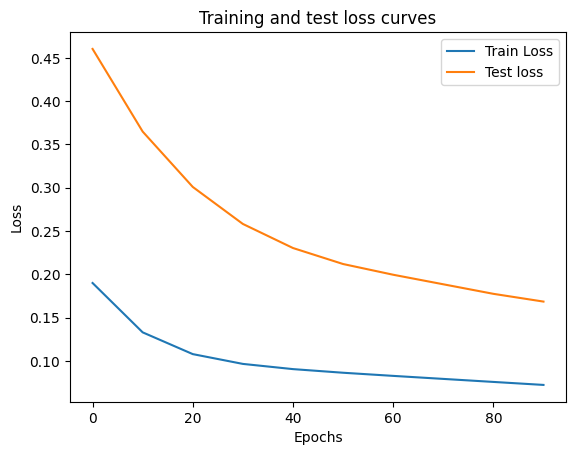

In [ ]:
plt.plot(epoch_count, train_loss_values, label= "Train Loss")
plt.plot(epoch_count, test_loss_values, label= "Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend()

**To inspect our model's .state_dict() is used to see how close our model gets to the original values we set for weight and bias.**

In [ ]:
print("Learned values of the weights and bias")
print(model_0.state_dict())
print("\n And the original values for weights and bias are: ")
print(f"Weights: {weight}, bias: {bias}")

Learned values of the weights and bias
OrderedDict([('weights', tensor([0.4437])), ('bias', tensor([0.3572]))])

 And the original values for weights and bias are: 
Weights: 0.7, bias: 0.3


**Making predictions with a trained PyTorch Model (inference)**

In [ ]:
#Set the model in evaluation mode
model_0.eval()
with torch.inference_mode():
  y_preds= model_0(X_test)
y_preds

tensor([[0.7295],
        [0.7366],
        [0.7438],
        [0.7509],
        [0.7581],
        [0.7652],
        [0.7724],
        [0.7795],
        [0.7867],
        [0.7938]])

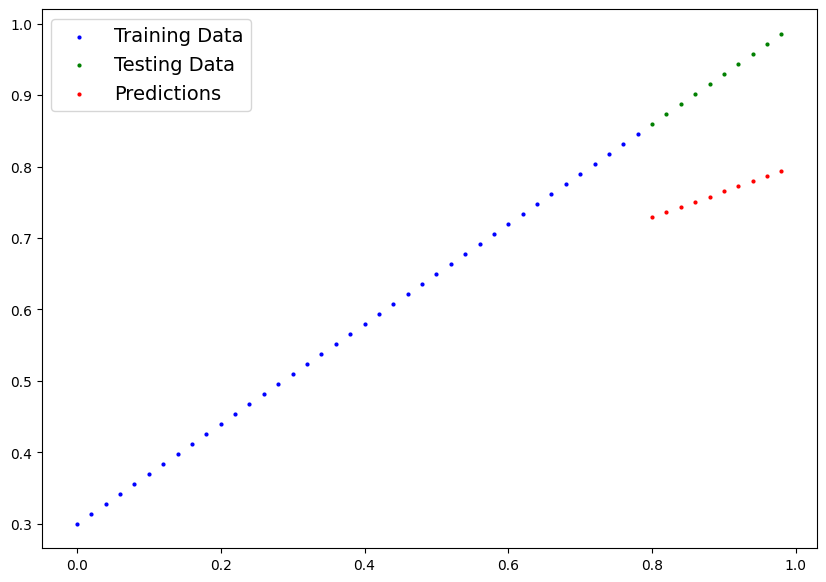

In [ ]:
plot_predictions(predictions= y_preds)


**Saving and loading models in PyTorch**

torch.save--> Save an object to the disk using PYthon's pickle utility. MOdels, tensor, and various other Python objects like dictionaries can be saved using torch.save

torch.load--> Uses pickle's unpickling features to deserialize and load pickled Python object files


torch.nn.Modlule.load_state_dict--> Loads  a model's paramter dictionary (model.state_dict()) using a saved state_dict() object

In [ ]:
from pathlib import Path

#Models directory creation

model_path= Path("models")
model_path.mkdir(parents= True, exist_ok= True)

model_name= "PytorchWorkflow_0.pth"
model_save_path= model_path/ model_name

#Save the model state dict
print(f"Saving model to: {model_save_path}")
torch.save(obj=model_0.state_dict(), f= model_save_path)

Saving model to: models/PytorchWorkflow_0.pth


In [ ]:
!ls -l models/PytorchWorkflow_0.pth

-rw-r--r-- 1 root root 1103 Sep 14 03:18 models/PytorchWorkflow_0.pth


In [ ]:
#Instantiate a new instance of our model

loaded_model_0= LinearRegressionModel()

loaded_model_0.load_state_dict(torch.load(f= model_save_path))

<All keys matched successfully>

In [ ]:
loaded_model_0.eval()
with torch.inference_mode():
  loaded_model_preds= loaded_model_0(X_test)

In [ ]:
y_preds== loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

**Putting it all together**

In [ ]:
import torch
from torch import nn
import matplotlib.pyplot as plt

In [ ]:
torch.__version__

'2.0.1+cu118'

In [ ]:
device= "cuda" if torch.cuda.is_availabe() else "cpu"
print(f"Using device: {device}")

AttributeError: ignored

In [ ]:
weight= 0.7
bias= 0.3

start= 0
end= 1
step= 0.02

X= torch.arange(start, end, step).unsqueeze(dim=1)
y= weight * X+ bias
X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [ ]:
#Split data
train_split= int(0.8*len(X))
X_train, y_train= X[:train_split], y[:train_split]
X_test, y_test= X[train_split:], y[train_split:]
len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

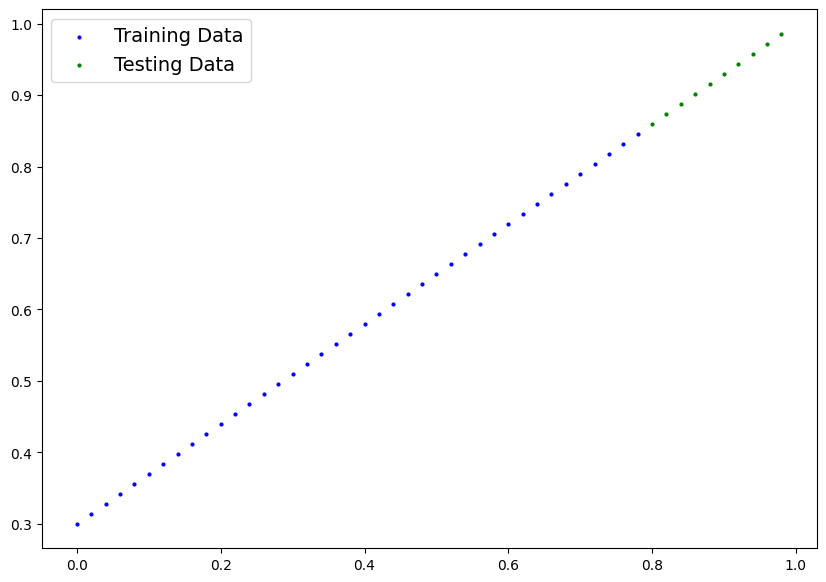

In [ ]:
plot_predictions(X_train, y_train, X_test, y_test)

In [ ]:
class LinearRegressionModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear_layer= nn.Linear(in_features=1, out_features= 1)

    def forward(self, x:torch.Tensor)->torch.Tensor:
      return self.linear_layer(x)



In [ ]:
torch.manual_seed(42)
model_1= LinearRegressionModelV2()
model_1, model_1.state_dict()

(LinearRegressionModelV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [ ]:
next(model_1.parameters()).device

device(type='cpu')

In [ ]:
model_1.to(device)
next(model_1.paramters()).device

NameError: ignored

Training


In [ ]:
loss_fn= nn.L1Loss()
optimizer= torch.optim.SGD(params= model_1.parameters(), lr=0.01)

In [ ]:
torch.manual_seed(42)
epochs=1000
X_train- X_train
X_test= X_test
y_train= y_train
y_test= y_test

for epoch in range(epochs):
  model_1.train()
  y_pred= model_1(X_train)
  loss= loss_fn(y_pred, y_train)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
  model_1.eval()



  ###Testing

  with torch.inference_mode():
    test_pred= model_1(X_test)
    test_loss= loss_fn(test_pred, y_test)

  if epoch% 100==0:
    print(f"Epoch: {epoch}| Train Loss: {loss}| Test loss: {test_loss}")


NotImplementedError: ignored